# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [21]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

In [2]:
browser = Browser('chrome')

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

In [4]:
# Create a Beautiful Soup Object
html = browser.html
souper = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
all_rows = souper.find("table", class_="table")

In [6]:
# Create an empty list
complete_data = []

# Loop through the scraped data to create a list of rows
rows = all_rows.find_all('tr', class_="data-row")
for row in rows:
    data_row = row.find_all('td')
    data_row_2 = []
    
    for td in data_row:
        td = td.text
        data_row_2.append(td)
        
    complete_data.append(data_row_2)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(complete_data)
df.columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [8]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = df['terrestrial_date'].apply(pd.to_datetime)
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [12]:
# 1. How many months are there on Mars?
number_months = len(df['month'].unique())
number_months

12

In [13]:
# 2. How many Martian days' worth of data are there?
mars_days = (df['sol'].max()) - (df['sol'].min())
mars_days

1967

In [14]:
# 3. What is the average low temperature by month?
mars_by_month = df.groupby('month')
avg_temp = mars_by_month['min_temp'].mean()
avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Average Minimum Temperature (C)')

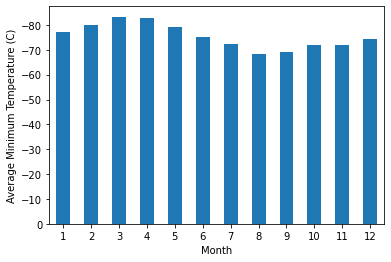

In [15]:
# Plot the average temperature by month
avg_temp.plot.bar(rot=0)
plt.gca().invert_yaxis()
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (C)")

In [16]:
# Identify the coldest and hottest months in Curiosity's location

On Mars, The coldest month on average is the third month, and the warmest month on average is the eigth month.

In [17]:
# 4. Average pressure by Martian month
avg_pressure = mars_by_month['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Atmospheric Pressure')

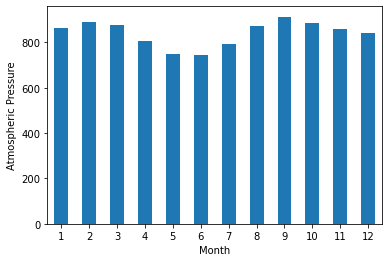

In [18]:
# Plot the average pressure by month
avg_pressure.plot.bar(rot=0)
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")

On Mars, atmospheric pressure is hightest on the ninth month and lowest on the sixth month.

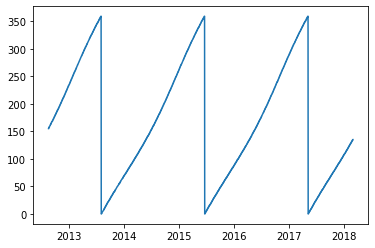

<Figure size 2520x1440 with 0 Axes>

In [29]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(df['terrestrial_date'], df['ls'])
plt.show()

The first 0 of Mars' solar longitude appears to come  roughly 3/5 of the way between 2013 and 2014, or day 219.
The second 2 of Mars' solar longitude appears to come roughly halfway between 2015 and 2016, or day 182.

The difference between the two is 693 days, which is a rough estimate of the amount of Earth days in a Martian year.
Looking online, the true amount of Earth days in a Martian year is 687, not too far off from the estimate.

In [81]:
# Write the data to a CSV
df.to_csv("mars_weather.csv", index=False, header=True)

In [30]:
browser.quit()